
# Primer Modelo de Machine Learning: Regresión Lineal  
## Módulo 3

En este módulo entrenarás tu **primer modelo real** de Machine Learning usando `scikit-learn`.

---

## Objetivos del módulo

Al finalizar, podrás:

- Explicar qué es la **regresión lineal** y cuándo usarla.
- Preparar `X` (features) y `y` (target) para entrenar un modelo.
- Entrenar un modelo con `LinearRegression`.
- Evaluar el desempeño usando métricas básicas: **MAE**, **MSE** y **R²**.
- Visualizar la predicción del modelo sobre los datos.

> Nota: La regresión lineal es una excelente puerta de entrada porque es simple e interpretable.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



## 1. ¿Qué es la regresión lineal?

La **regresión lineal** es un modelo que intenta describir la relación entre:

- una o más **variables de entrada** (features) → `X`
- una **variable objetivo** (target) → `y`

En la forma más simple (una sola variable de entrada), busca una línea:

\[ y = m x + b \]

- `m` es la pendiente (cuánto cambia `y` cuando `x` aumenta)
- `b` es el intercepto (valor de `y` cuando `x = 0`)

### ¿Cuándo usarla?
Cuando sospechas que existe una relación aproximadamente lineal entre variables.

Ejemplos:
- Clientes → ventas
- Temperatura → consumo eléctrico
- Publicidad → ventas



## 2. Crear (o cargar) un dataset de ejemplo

Usaremos el mismo estilo de ejemplo del Módulo 2: **clientes vs ventas**.


In [2]:

data = {
    "Clientes_Visitantes": [10, 20, 30, 35, 40, 50, 55, 60, 70, 80, 90, 100],
    "Ventas_Diarias":      [200, 250, 270, 300, 320, 400, 420, 450, 500, 550, 600, 650]
}

df = pd.DataFrame(data)
df.head()


,Clientes_Visitantes,Ventas_Diarias
0,10,200
1,20,250
2,30,270
3,35,300
4,40,320



## 3. Visualizar los datos

Antes de entrenar un modelo, conviene ver la relación entre `X` e `y`.


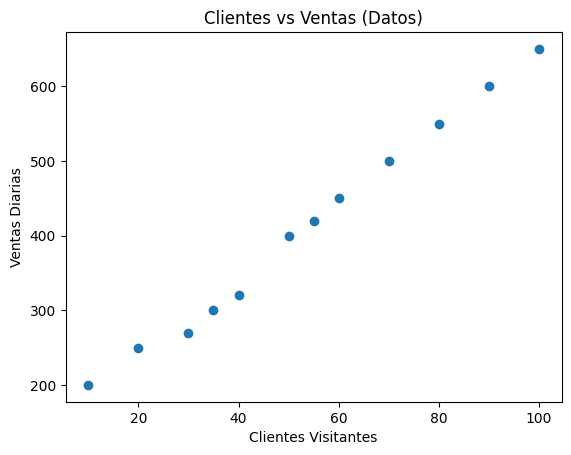

In [3]:

plt.figure()
plt.scatter(df["Clientes_Visitantes"], df["Ventas_Diarias"])
plt.xlabel("Clientes Visitantes")
plt.ylabel("Ventas Diarias")
plt.title("Clientes vs Ventas (Datos)")
plt.show()



## 4. Preparar `X` (features) y `y` (target)

- `X` será la columna de clientes (en formato de tabla)
- `y` será la columna de ventas (en formato de serie)

Luego haremos la separación en entrenamiento y prueba.


In [4]:

X = df[["Clientes_Visitantes"]]   # DataFrame (2D)
y = df["Ventas_Diarias"]          # Series (1D)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)


Tamaño X_train: (8, 1)
Tamaño X_test: (4, 1)



## 5. Entrenar el modelo

Usaremos `LinearRegression` de `scikit-learn`.


In [5]:

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Modelo entrenado")
print("Pendiente (m):", modelo.coef_[0])
print("Intercepto (b):", modelo.intercept_)


Modelo entrenado
Pendiente (m): 5.268436578171091
Intercepto (b): 125.66371681415933



## 6. Hacer predicciones

- `y_pred_train`: predicciones sobre el set de entrenamiento  
- `y_pred_test`: predicciones sobre el set de prueba


In [6]:

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

y_pred_test


array([599.82300885, 547.13864307, 178.3480826 , 494.45427729])


## 7. Evaluar el modelo

Usaremos tres métricas comunes:

- **MAE (Mean Absolute Error)**: promedio del error absoluto  
- **MSE (Mean Squared Error)**: promedio del error al cuadrado  
- **R² (coeficiente de determinación)**: mide qué tan bien se ajusta el modelo (1.0 es perfecto)

> No existe una métrica “mágica”: depende del problema, del contexto y de la escala de los datos.


In [7]:

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Métricas en TEST")
print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


Métricas en TEST
MAE: 7.5589970501474895
MSE: 126.9448142637112
R²: 0.9947584076691113



## 8. Visualizar la línea de regresión

Vamos a dibujar:

- puntos reales (datos)
- la línea de predicción del modelo


/opt/anaconda3/envs/jb/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


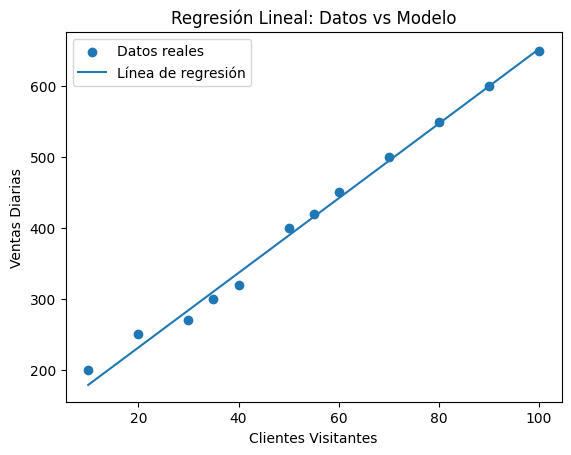

In [8]:

# Crear una línea continua de X para graficar
x_line = np.linspace(df["Clientes_Visitantes"].min(), df["Clientes_Visitantes"].max(), 100).reshape(-1, 1)
y_line = modelo.predict(x_line)

plt.figure()
plt.scatter(df["Clientes_Visitantes"], df["Ventas_Diarias"], label="Datos reales")
plt.plot(x_line, y_line, label="Línea de regresión")
plt.xlabel("Clientes Visitantes")
plt.ylabel("Ventas Diarias")
plt.title("Regresión Lineal: Datos vs Modelo")
plt.legend()
plt.show()



## 9. Actividad: predicción con un valor nuevo

Imagina que mañana visitan la tienda **75 clientes**.  
¿El modelo qué ventas predice?


In [9]:

clientes_nuevo = pd.DataFrame({"Clientes_Visitantes": [75]})
venta_predicha = modelo.predict(clientes_nuevo)[0]

print("Clientes:", clientes_nuevo.iloc[0,0])
print("Venta predicha:", venta_predicha)


Clientes: 75
Venta predicha: 520.7964601769911



## 10. Reflexión docente (muy importante)

1. ¿Qué tan razonable te parece la predicción del modelo?  
2. ¿Qué cosas podrían afectar las ventas además del número de clientes (features faltantes)?  
3. ¿Qué riesgos hay en usar un modelo con pocos datos?

> En ML, mejorar un modelo muchas veces depende más de **mejores datos** que de un algoritmo más complejo.



## Resumen del Módulo 3

Aprendiste a:

- Entrenar tu primer modelo real de ML con `LinearRegression`
- Interpretar pendiente e intercepto
- Evaluar con MAE, MSE y R²
- Visualizar la línea de regresión
- Hacer predicciones con nuevos valores

En el siguiente módulo, podemos pasar a **clasificación** (por ejemplo: spam/no spam o aprobar/no aprobar).
